### Read data

In [1]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns

# We also want to plot graphs and histograms
# using matplotlib
import matplotlib.pyplot as plt

dataCondition1 = pd.read_csv('conditionA.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataCondition1["condition"] = "Arrow"
dataCondition1

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow
1,A01,467.60004,612.51996,5,4,1,0.760010,Yes,Arrow
2,A02,427.00000,393.68000,5,3,5,29.599990,Yes,Arrow
3,A03,506.00000,425.71997,6,3,3,89.560000,Yes,Arrow
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow
5,A06,411.24000,981.28000,9,4,3,18.559998,Yes,Arrow
6,A08,411.96000,384.44003,5,3,0,0.000000,Yes,Arrow
7,A11,473.32000,338.36000,3,3,1,1.240021,Yes,Arrow
8,A12,742.56000,206.15997,3,4,1,-1.000000,Left aid,Arrow
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow


In [2]:
dataCondition2 = pd.read_csv('conditionB.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataCondition2["condition"] = "NPC"
dataCondition2

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,B00,806.44000,257.64008,3,4,1,15.720001,Yes,NPC
1,B01,464.32000,268.47998,2,3,3,77.880005,Yes,NPC
2,B03,353.68000,355.80000,6,2,1,0.040009,Yes,NPC
3,B04,336.40000,283.00003,1,1,3,4.839996,Yes,NPC
4,B05,493.96002,345.31995,6,2,7,90.439960,Yes,NPC
5,B06,966.72000,376.60010,5,2,15,328.679930,Yes,NPC
6,B07,748.92000,502.84003,5,3,19,188.639980,Yes,NPC
7,B09,316.08002,415.39996,5,3,0,0.000000,Yes,NPC
8,B10,572.76000,553.91990,6,3,3,132.040010,Yes,NPC
9,B12,315.52000,1324.08010,12,4,0,0.000000,Yes,NPC


In [3]:
surveyDataA = pd.read_csv('surveyA.csv', header=0, names = ['study completion time', 'consent', 'downloaded game', 'participant number', 'gender', 'age', 'favorite games', 'player archetype', 'completed game', 'technical issues', 'additional comments'])  #Reading data where the arrow was the navigational aid
surveyDataA

,study completion time,consent,downloaded game,participant number,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,2020/11/27 2:08:16 PM GMT+2,Yes,Yes!,A00,Male,23,"Fallout: New Vegas, Battlefield Bad Company 2,...",Daredevil - all about the thrill of the chase...,Yes!,NaN,Fun little game - I low key wonder if there we...
1,2020/11/27 4:04:04 PM GMT+2,Yes,Yes!,A03,Female,22,"Portal, The last of us, League of legends",Mastermind - enjoys solving puzzles and devisi...,Yes!,NaN,NaN
2,2020/11/27 4:34:02 PM GMT+2,Yes,Yes!,A04,Male,29,"The Witcher 3, Crusader Kings 2, Europa Univer...",Mastermind - enjoys solving puzzles and devisi...,Yes!,NaN,Cool game! Would've like to get me some of tho...
3,2020/11/27 4:48:14 PM GMT+2,Yes,Yes!,A06,Female,26,"Tomb raider, Ori and the blind forest, Echo",Mastermind - enjoys solving puzzles and devisi...,Yes!,NaN,NaN
4,2020/11/27 5:15:42 PM GMT+2,Yes,Yes!,A08,Male,21,Age of Empires 3\nGrand Theft Auto: San Andrea...,Conqueror - enjoys defeating impossibly diffic...,Yes!,Lagging a little bit while you are at at cave...,This game needs more sexual content and violence
5,2020/11/27 5:43:37 PM GMT+2,Yes,Yes!,A05,Male,22,"Warhammer 40k Dawn of War, Stronghold, Battlef...",Seeker - curious about the game world and enjo...,Yes!,"Nothing special, I just saw once white line be...","Tale at beggining was fantastic, music as well..."
6,2020/11/27 6:30:06 PM GMT+2,Yes,Yes!,A07,Male,22,"Death Stranding, Red Dead Redemption 2, XCOM 2",Seeker - curious about the game world and enjo...,Yes!,got stuck for a second between a rock and a wa...,Enjoyed the game and the soundtrack
7,2020/11/27 7:36:00 PM GMT+2,Yes,Yes!,A01,Male,20,"GTA 5, NBA2k17, Among us","Achiever - goal-oriented, motivated by long-te...",Yes!,The only technical issue I experienced is load...,"Was fun running around, but the whole idea of ..."
8,2020/11/28 4:11:21 PM GMT+2,Yes,Yes!,A11,Male,21,"Civilization V, CS:GO, Witcher 3",Survivor - enjoys the intensity of strong nega...,Yes!,Laggy movement,NaN
9,2020/11/28 4:42:45 PM GMT+2,Yes,Yes!,A13,Male,23,"League of Legends, Europa Universalis 4, Rimworld",Mastermind - enjoys solving puzzles and devisi...,Yes!,No issues.,That was fun.


In [4]:
surveyDataB = pd.read_csv('surveyB.csv', header=0, names = ['study completion time', 'consent', 'downloaded game', 'participant number', 'gender', 'age', 'favorite games', 'player archetype', 'completed game', 'technical issues', 'additional comments'])  #Reading data where the arrow was the navigational aid
surveyDataB

,study completion time,consent,downloaded game,participant number,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,2020/11/27 2:50:52 PM GMT+2,Yes,Yes!,B00,Male,22,"World of Warcraft, League of Legends, Pokemon",Seeker - curious about the game world and enjo...,Yes!,NaN,The part I enjoyed the most was the soundtrack...
1,2020/11/27 3:52:51 PM GMT+2,Yes,Yes!,B05,Female,20,"Portal 2, To The Moon, Terraria",Mastermind - enjoys solving puzzles and devisi...,Yes!,No technical issues.,It's weird that you can jump on plants as a fu...
2,2020/11/27 4:50:30 PM GMT+2,Yes,Yes!,B08,Male,17,"League of legends, World of warcraft and Apex ...",Conqueror - enjoys defeating impossibly diffic...,Yes!,I did not any of that,"I loved the game, good job on that and good lu..."
3,2020/11/27 6:48:54 PM GMT+2,Yes,Yes!,B09,Male,22,"Fallout New Vegas, Mafia II, Mass Effect 2","Achiever - goal-oriented, motivated by long-te...",Yes!,"Had no technical issues, overall game ran very...","Overall, the bear controlled very smoothly the..."
4,2020/11/28 10:48:06 AM GMT+2,Yes,Yes!,B01,Male,26,"Bastion, Divinity Original Sin 2, Hollow Knight",Seeker - curious about the game world and enjo...,Yes!,NaN,On getting the text file to send back I accide...
5,2020/11/28 2:49:01 PM GMT+2,Yes,Yes!,B04,Male,20,-Rocket League\n-Life is Strange\n-The last of us,Seeker - curious about the game world and enjo...,Yes!,"No major ones, only thing I noticed was that t...",Actually a beautiful game! Had fun exploring a...
6,2020/11/28 3:54:46 PM GMT+2,Yes,Yes!,B12,Male,22,"Fallout 1&2, Far Cry 2, Red Dead Redemption 2",Conqueror - enjoys defeating impossibly diffic...,Yes!,NaN,The bees were too large. You had to be feeding...
7,2020/11/28 7:09:37 PM GMT+2,Yes,Yes!,B14,Male,22,"Warcraft 3, Borderlands 2, Stronghold Crusader",Mastermind - enjoys solving puzzles and devisi...,Yes!,frame rate and unresponsive movement controls ...,very cute
8,2020/11/28 7:16:54 PM GMT+2,Yes,Yes!,B17,Male,24,"Kingdom hearts 2, Fairy tail, League of Legends",Seeker - curious about the game world and enjo...,Yes!,"Didn't had any trouble, no lag runned smoothly",Longest chase in my life could have made it sh...
9,2020/11/28 7:50:18 PM GMT+2,Yes,Yes!,B07,Male,23,"Fallout 4, World war Z, This war of Mine",Socialiser - finds people to be a primary sour...,Yes!,NaN,i got lost alot


In [5]:
dataA = pd.merge(dataCondition1, surveyDataA, on='participant number')
dataA

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition,study completion time,consent,downloaded game,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow,2020/11/27 2:08:16 PM GMT+2,Yes,Yes!,Male,23,"Fallout: New Vegas, Battlefield Bad Company 2,...",Daredevil - all about the thrill of the chase...,Yes!,NaN,Fun little game - I low key wonder if there we...
1,A01,467.60004,612.51996,5,4,1,0.760010,Yes,Arrow,2020/11/27 7:36:00 PM GMT+2,Yes,Yes!,Male,20,"GTA 5, NBA2k17, Among us","Achiever - goal-oriented, motivated by long-te...",Yes!,The only technical issue I experienced is load...,"Was fun running around, but the whole idea of ..."
2,A02,427.00000,393.68000,5,3,5,29.599990,Yes,Arrow,2020/12/01 3:23:01 PM GMT+2,Yes,Yes!,Male,22,"Age of Empires III, Kona, Battle Brothers",Seeker - curious about the game world and enjo...,Yes!,Slight FPS drop in a cave,NaN
3,A03,506.00000,425.71997,6,3,3,89.560000,Yes,Arrow,2020/11/27 4:04:04 PM GMT+2,Yes,Yes!,Female,22,"Portal, The last of us, League of legends",Mastermind - enjoys solving puzzles and devisi...,Yes!,NaN,NaN
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow,2020/11/27 4:34:02 PM GMT+2,Yes,Yes!,Male,29,"The Witcher 3, Crusader Kings 2, Europa Univer...",Mastermind - enjoys solving puzzles and devisi...,Yes!,NaN,Cool game! Would've like to get me some of tho...
5,A06,411.24000,981.28000,9,4,3,18.559998,Yes,Arrow,2020/11/27 4:48:14 PM GMT+2,Yes,Yes!,Female,26,"Tomb raider, Ori and the blind forest, Echo",Mastermind - enjoys solving puzzles and devisi...,Yes!,NaN,NaN
6,A08,411.96000,384.44003,5,3,0,0.000000,Yes,Arrow,2020/11/27 5:15:42 PM GMT+2,Yes,Yes!,Male,21,Age of Empires 3\nGrand Theft Auto: San Andrea...,Conqueror - enjoys defeating impossibly diffic...,Yes!,Lagging a little bit while you are at at cave...,This game needs more sexual content and violence
7,A11,473.32000,338.36000,3,3,1,1.240021,Yes,Arrow,2020/11/28 4:11:21 PM GMT+2,Yes,Yes!,Male,21,"Civilization V, CS:GO, Witcher 3",Survivor - enjoys the intensity of strong nega...,Yes!,Laggy movement,NaN
8,A12,742.56000,206.15997,3,4,1,-1.000000,Left aid,Arrow,2020/11/30 6:46:12 PM GMT+2,Yes,Yes!,Male,23,"Fallout 4, DnD, Darkest Dungeon",Seeker - curious about the game world and enjo...,Yes!,NaN,Love the music
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow,2020/11/28 4:42:45 PM GMT+2,Yes,Yes!,Male,23,"League of Legends, Europa Universalis 4, Rimworld",Mastermind - enjoys solving puzzles and devisi...,Yes!,No issues.,That was fun.


In [6]:
dataB = pd.merge(dataCondition2, surveyDataB, on='participant number')
dataB

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition,study completion time,consent,downloaded game,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,B00,806.44000,257.64008,3,4,1,15.720001,Yes,NPC,2020/11/27 2:50:52 PM GMT+2,Yes,Yes!,Male,22,"World of Warcraft, League of Legends, Pokemon",Seeker - curious about the game world and enjo...,Yes!,NaN,The part I enjoyed the most was the soundtrack...
1,B01,464.32000,268.47998,2,3,3,77.880005,Yes,NPC,2020/11/28 10:48:06 AM GMT+2,Yes,Yes!,Male,26,"Bastion, Divinity Original Sin 2, Hollow Knight",Seeker - curious about the game world and enjo...,Yes!,NaN,On getting the text file to send back I accide...
2,B03,353.68000,355.80000,6,2,1,0.040009,Yes,NPC,2020/12/01 12:17:35 PM GMT+2,Yes,Yes!,Female,22,"Legend of Zelda, Pokemon, Mario Kart",Seeker - curious about the game world and enjo...,Yes!,"I was stuck in dead end, with the bees behind ...","It was a long road, and I it got the tiniest b..."
3,B04,336.40000,283.00003,1,1,3,4.839996,Yes,NPC,2020/11/28 2:49:01 PM GMT+2,Yes,Yes!,Male,20,-Rocket League\n-Life is Strange\n-The last of us,Seeker - curious about the game world and enjo...,Yes!,"No major ones, only thing I noticed was that t...",Actually a beautiful game! Had fun exploring a...
4,B05,493.96002,345.31995,6,2,7,90.439960,Yes,NPC,2020/11/27 3:52:51 PM GMT+2,Yes,Yes!,Female,20,"Portal 2, To The Moon, Terraria",Mastermind - enjoys solving puzzles and devisi...,Yes!,No technical issues.,It's weird that you can jump on plants as a fu...
5,B06,966.72000,376.60010,5,2,15,328.679930,Yes,NPC,2020/11/30 7:04:11 PM GMT+2,Yes,Yes!,Male,25,"Overwatch, Spider man (ps4),Borderlands 2.",Mastermind - enjoys solving puzzles and devisi...,Yes!,NaN,Everything looks amazing makes feel like you a...
6,B07,748.92000,502.84003,5,3,19,188.639980,Yes,NPC,2020/11/28 7:50:18 PM GMT+2,Yes,Yes!,Male,23,"Fallout 4, World war Z, This war of Mine",Socialiser - finds people to be a primary sour...,Yes!,NaN,i got lost alot
7,B09,316.08002,415.39996,5,3,0,0.000000,Yes,NPC,2020/11/27 6:48:54 PM GMT+2,Yes,Yes!,Male,22,"Fallout New Vegas, Mafia II, Mass Effect 2","Achiever - goal-oriented, motivated by long-te...",Yes!,"Had no technical issues, overall game ran very...","Overall, the bear controlled very smoothly the..."
8,B10,572.76000,553.91990,6,3,3,132.040010,Yes,NPC,2020/12/01 1:11:54 AM GMT+2,Yes,Yes!,Female,28,"Echo, Oxenfree, Divinity Original Sin 2",Seeker - curious about the game world and enjo...,Yes!,I have stuck between the plants and the bees c...,NaN
9,B12,315.52000,1324.08010,12,4,0,0.000000,Yes,NPC,2020/11/28 3:54:46 PM GMT+2,Yes,Yes!,Male,22,"Fallout 1&2, Far Cry 2, Red Dead Redemption 2",Conqueror - enjoys defeating impossibly diffic...,Yes!,NaN,The bees were too large. You had to be feeding...


In [7]:
data = pd.concat([dataA, dataB]).reset_index(drop = True)
data.head(60)

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition,study completion time,consent,downloaded game,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow,2020/11/27 2:08:16 PM GMT+2,Yes,Yes!,Male,23,"Fallout: New Vegas, Battlefield Bad Company 2,...",Daredevil - all about the thrill of the chase...,Yes!,NaN,Fun little game - I low key wonder if there we...
1,A01,467.60004,612.51996,5,4,1,0.760010,Yes,Arrow,2020/11/27 7:36:00 PM GMT+2,Yes,Yes!,Male,20,"GTA 5, NBA2k17, Among us","Achiever - goal-oriented, motivated by long-te...",Yes!,The only technical issue I experienced is load...,"Was fun running around, but the whole idea of ..."
2,A02,427.00000,393.68000,5,3,5,29.599990,Yes,Arrow,2020/12/01 3:23:01 PM GMT+2,Yes,Yes!,Male,22,"Age of Empires III, Kona, Battle Brothers",Seeker - curious about the game world and enjo...,Yes!,Slight FPS drop in a cave,NaN
3,A03,506.00000,425.71997,6,3,3,89.560000,Yes,Arrow,2020/11/27 4:04:04 PM GMT+2,Yes,Yes!,Female,22,"Portal, The last of us, League of legends",Mastermind - enjoys solving puzzles and devisi...,Yes!,NaN,NaN
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow,2020/11/27 4:34:02 PM GMT+2,Yes,Yes!,Male,29,"The Witcher 3, Crusader Kings 2, Europa Univer...",Mastermind - enjoys solving puzzles and devisi...,Yes!,NaN,Cool game! Would've like to get me some of tho...
5,A06,411.24000,981.28000,9,4,3,18.559998,Yes,Arrow,2020/11/27 4:48:14 PM GMT+2,Yes,Yes!,Female,26,"Tomb raider, Ori and the blind forest, Echo",Mastermind - enjoys solving puzzles and devisi...,Yes!,NaN,NaN
6,A08,411.96000,384.44003,5,3,0,0.000000,Yes,Arrow,2020/11/27 5:15:42 PM GMT+2,Yes,Yes!,Male,21,Age of Empires 3\nGrand Theft Auto: San Andrea...,Conqueror - enjoys defeating impossibly diffic...,Yes!,Lagging a little bit while you are at at cave...,This game needs more sexual content and violence
7,A11,473.32000,338.36000,3,3,1,1.240021,Yes,Arrow,2020/11/28 4:11:21 PM GMT+2,Yes,Yes!,Male,21,"Civilization V, CS:GO, Witcher 3",Survivor - enjoys the intensity of strong nega...,Yes!,Laggy movement,NaN
8,A12,742.56000,206.15997,3,4,1,-1.000000,Left aid,Arrow,2020/11/30 6:46:12 PM GMT+2,Yes,Yes!,Male,23,"Fallout 4, DnD, Darkest Dungeon",Seeker - curious about the game world and enjo...,Yes!,NaN,Love the music
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow,2020/11/28 4:42:45 PM GMT+2,Yes,Yes!,Male,23,"League of Legends, Europa Universalis 4, Rimworld",Mastermind - enjoys solving puzzles and devisi...,Yes!,No issues.,That was fun.


### Looking at the data

In [8]:
dataA.describe()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
count,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,451.589191,426.15677,5.243243,2.729730,2.729730,38.660536,24.135135
std,131.431709,169.48836,1.861979,1.121721,3.517011,75.108406,4.014987
min,302.400000,206.15997,2.000000,0.000000,0.000000,-1.000000,20.000000
25%,357.840000,313.59998,4.000000,2.000000,1.000000,0.000000,22.000000
50%,411.960000,384.44003,5.000000,3.000000,1.000000,5.880005,23.000000
75%,500.840030,553.92004,6.000000,4.000000,3.000000,44.400000,25.000000
max,837.000000,981.28000,9.000000,4.000000,15.000000,376.039920,36.000000


In [9]:
dataB.describe()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,452.549745,412.213338,4.820513,2.641026,2.794872,49.275890,24.769231
std,175.910117,196.929433,2.584079,1.111831,4.623621,98.306420,3.765924
min,284.680000,191.239990,0.000000,0.000000,0.000000,-1.000000,20.000000
25%,317.500000,297.580000,3.000000,2.000000,0.000000,0.000000,22.000000
50%,377.800000,372.759980,5.000000,3.000000,1.000000,0.000000,23.000000
75%,533.360010,473.279985,6.000000,4.000000,3.000000,46.919996,27.500000
max,966.720000,1324.080100,13.000000,4.000000,19.000000,419.799960,35.000000


In [10]:
data.describe()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,452.082107,419.001588,5.026316,2.684211,2.763158,44.107888,24.460526
std,154.823690,182.994500,2.256686,1.110081,4.095098,87.366137,3.876221
min,284.680000,191.239990,0.000000,0.000000,0.000000,-1.000000,20.000000
25%,340.130000,304.600000,4.000000,2.000000,0.000000,0.000000,22.000000
50%,390.980000,375.740070,5.000000,3.000000,1.000000,1.000015,23.000000
75%,502.130022,491.349978,6.000000,4.000000,3.000000,44.720002,26.250000
max,966.720000,1324.080100,13.000000,4.000000,19.000000,419.799960,36.000000


In [11]:
dataA.corr()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
time going forward,1.000000,-0.252128,-0.124611,0.048575,0.619504,0.698167,-0.132390
time going back,-0.252128,1.000000,0.710178,0.429294,-0.284225,-0.294789,0.013757
mistakes made,-0.124611,0.710178,1.000000,0.205245,-0.138145,-0.100382,0.088373
shortcuts taken,0.048575,0.429294,0.205245,1.000000,-0.159851,-0.047291,-0.158195
times wandered away from navigational aid,0.619504,-0.284225,-0.138145,-0.159851,1.000000,0.736692,-0.015046
time spent away from navigational aid,0.698167,-0.294789,-0.100382,-0.047291,0.736692,1.000000,-0.042872
age,-0.132390,0.013757,0.088373,-0.158195,-0.015046,-0.042872,1.000000


In [12]:
dataB.corr()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
time going forward,1.000000,-0.168308,-0.048770,0.208233,0.633805,0.714631,-0.032906
time going back,-0.168308,1.000000,0.692008,0.302083,-0.092346,-0.054554,-0.106123
mistakes made,-0.048770,0.692008,1.000000,0.169333,-0.084658,-0.067359,-0.199071
shortcuts taken,0.208233,0.302083,0.169333,1.000000,0.072324,-0.002383,-0.076871
times wandered away from navigational aid,0.633805,-0.092346,-0.084658,0.072324,1.000000,0.661873,-0.026972
time spent away from navigational aid,0.714631,-0.054554,-0.067359,-0.002383,0.661873,1.000000,0.263958
age,-0.032906,-0.106123,-0.199071,-0.076871,-0.026972,0.263958,1.000000


In [13]:
data.corr()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
time going forward,1.000000,-0.199542,-0.074338,0.139939,0.628779,0.707674,-0.074025
time going back,-0.199542,1.000000,0.696174,0.359365,-0.165678,-0.148482,-0.053038
mistakes made,-0.074338,0.696174,1.000000,0.184325,-0.103198,-0.083913,-0.083714
shortcuts taken,0.139939,0.359365,0.184325,1.000000,-0.025471,-0.023538,-0.120685
times wandered away from navigational aid,0.628779,-0.165678,-0.103198,-0.025471,1.000000,0.687618,-0.020756
time spent away from navigational aid,0.707674,-0.148482,-0.083913,-0.023538,0.687618,1.000000,0.132911
age,-0.074025,-0.053038,-0.083714,-0.120685,-0.020756,0.132911,1.000000


### Demographic data

Males: 31
Females: 6


Text(0, 0.5, 'Number of participants')

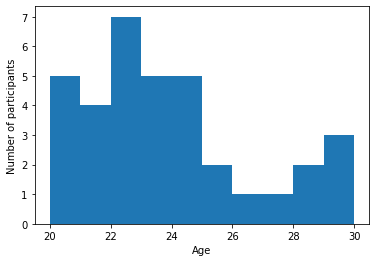

In [14]:
#Gender
dataMaleA = data.loc[(data["condition"] == "Arrow") & (data["gender"] == "Male"), "completed game"]
dataFemaleA = data.loc[(data["condition"] == "Arrow") & (data["gender"] == "Female"), "completed game"]
print("Males: " + str(dataMaleA.count()))  # condition of males
print("Females: " + str(dataFemaleA.count()))# count of females

#age
plt.hist(dataA["age"], bins = 10, range = (20,30))
plt.xlabel("Age")
plt.ylabel("Number of participants")

Males: 33
Females: 6


Text(0, 0.5, 'Number of participants')

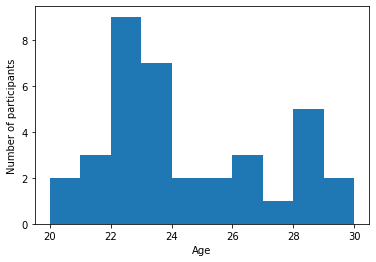

In [15]:
#Gender
dataMaleB = data.loc[(data["condition"] == "NPC") & (data["gender"] == "Male"), "completed game"]
dataFemaleB = data.loc[(data["condition"] == "NPC") & (data["gender"] == "Female"), "completed game"]
print("Males: " + str(dataMaleB.count()))  # condition of males
print("Females: " + str(dataFemaleB.count()))# count of females

#age
plt.hist(dataB["age"], bins = 10, range = (20,30))
plt.xlabel("Age")
plt.ylabel("Number of participants")

Archetypes

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

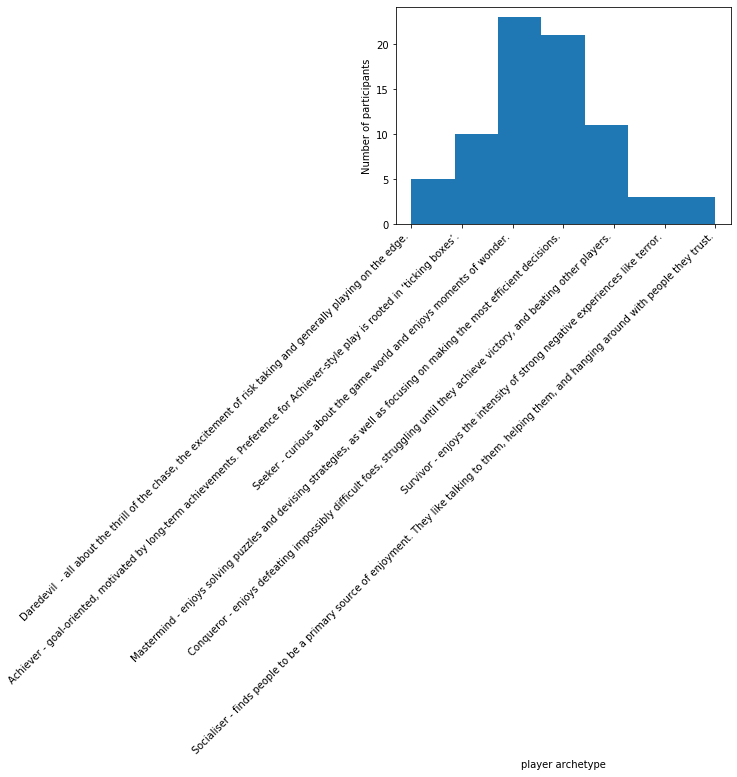

In [16]:
#age
plt.hist(data["player archetype"], bins = 7)
plt.xlabel("player archetype")
plt.ylabel("Number of participants")
plt.xticks(rotation='45', ha="right")

Text(0, 0.5, 'Number of participants')

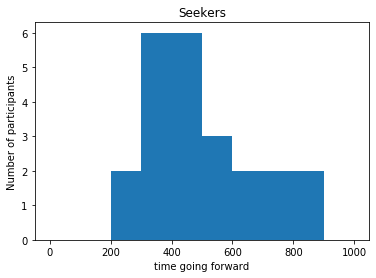

In [17]:
plt.hist(data.loc[data["player archetype"] == "Seeker - curious about the game world and enjoys moments of wonder.", 'time going forward'], bins = 10, range = (0,1000))
plt.title("Seekers")
plt.xlabel("time going forward")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

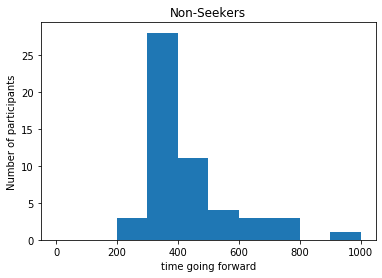

In [18]:
plt.hist(data.loc[data["player archetype"] != "Seeker - curious about the game world and enjoys moments of wonder.", 'time going forward'], bins = 10, range = (0,1000))
plt.title("Non-Seekers")
plt.xlabel("time going forward")
plt.ylabel("Number of participants")

### Test data

Time going forward

Text(0, 0.5, 'Number of participants')

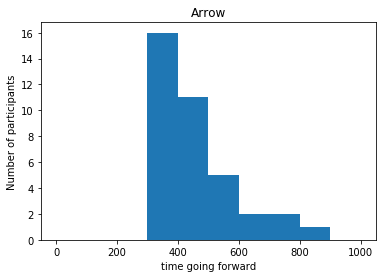

In [19]:
plt.hist(data.loc[data["condition"] == "Arrow", 'time going forward'], bins = 10, range = (0,1000))
plt.title("Arrow")
plt.xlabel("time going forward")
plt.ylabel("Number of participants")

Text(0, 0.5, 'Number of participants')

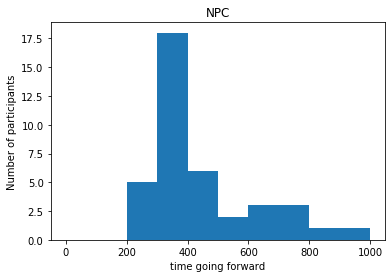

In [20]:
plt.hist(data.loc[data["condition"] == "NPC", 'time going forward'], bins = 10, range = (0,1000))
plt.title("NPC")
plt.xlabel("time going forward")
plt.ylabel("Number of participants")

Time going back

Text(0, 0.5, 'Number of participants')

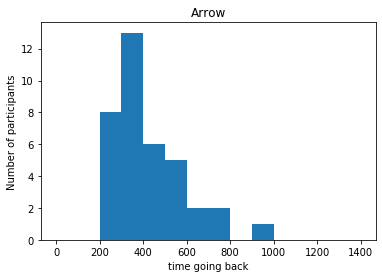

In [21]:
plt.hist(data.loc[data["condition"] == "Arrow", 'time going back'], bins = 14, range = (0,1400))
plt.title("Arrow")
plt.xlabel("time going back")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

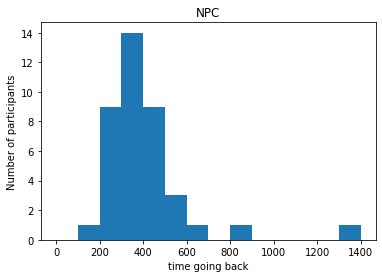

In [22]:
plt.hist(data.loc[data["condition"] == "NPC", 'time going back'], bins = 14, range = (0,1400))
plt.title("NPC")
plt.xlabel("time going back")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

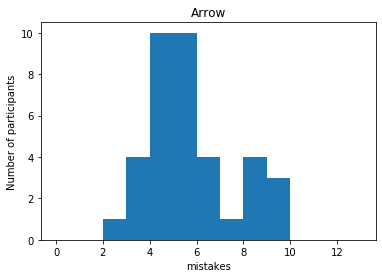

In [23]:
plt.hist(data.loc[data["condition"] == "Arrow", 'mistakes made'], bins = 13, range = (0,13))
plt.title("Arrow")
plt.xlabel("mistakes")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

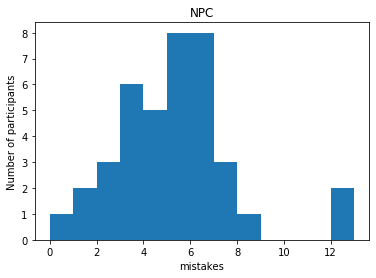

In [24]:
plt.hist(data.loc[data["condition"] == "NPC", 'mistakes made'], bins = 13, range = (0,13))
plt.title("NPC")
plt.xlabel("mistakes")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

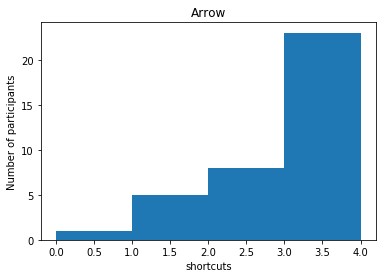

In [25]:
plt.hist(data.loc[data["condition"] == "Arrow", 'shortcuts taken'], bins = 4, range = (0,4))
plt.title("Arrow")
plt.xlabel("shortcuts")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

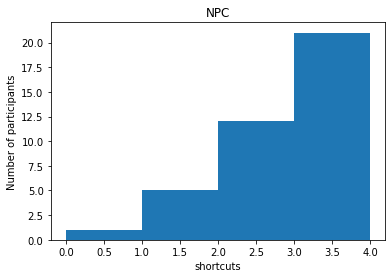

In [26]:
plt.hist(data.loc[data["condition"] == "NPC", 'shortcuts taken'], bins = 4, range = (0,4))
plt.title("NPC")
plt.xlabel("shortcuts")
plt.ylabel("Number of participants")

### Descriptive Statistics

In [27]:
arrowMean = data.loc[data["condition"] == "Arrow", 'time going back'].mean()
npcMean = data.loc[data["condition"] == "NPC", 'time going back'].mean()

arrowStd = data.loc[data["condition"] == "Arrow", 'time going back'].std()
npcStd = data.loc[data["condition"] == "NPC", 'time going back'].std()
print(arrowMean)
print(npcMean)
print(arrowStd)
print(npcStd)


426.15677
412.2133376923077
169.48836001754006
196.92943311010904


Find effect size using Cohens d

In [28]:
from numpy import std, mean, sqrt

#correct if the population S.D. is expected to be equal for the two groups.
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

x = data.loc[data["condition"] == "Arrow", 'time going back']
y = data.loc[data["condition"] == "NPC", 'time going back']
#print(x)

#correct only if nx=ny
d = (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)
print ("d by the 1st method = " + str(d))
if (len(x) != len(y)):
    print("The first method is incorrect because nx is not equal to ny.")

#correct for more general case including nx !=ny
print ("d by the more general 2nd method = " + str(cohen_d(x,y)))

d by the 1st method = 0.07589421254537723
The first method is incorrect because nx is not equal to ny.
d by the more general 2nd method = 0.07574191470888259


If the data is parametric we use independant t-test: ttest_ind

If it is not parametric :( we use: mannwhitneyu

### Comparing time going back

In [29]:
arrowTime = data.loc[data["condition"] == "Arrow", 'time going back']
npcTime = data.loc[data["condition"] == "NPC", 'time going back']
stats.ttest_ind(arrowTime, npcTime)

Ttest_indResult(statistic=0.33003701387230217, pvalue=0.7423044952087885)

### Comparing mistakes made

In [39]:
arrowMistakes = data.loc[data["condition"] == "Arrow", 'mistakes made']
npcMistakes = data.loc[data["condition"] == "NPC", 'mistakes made']
stats.ttest_ind(arrowMistakes, npcMistakes)

Ttest_indResult(statistic=0.8144071608897248, pvalue=0.41802488799826154)

### Boxplot

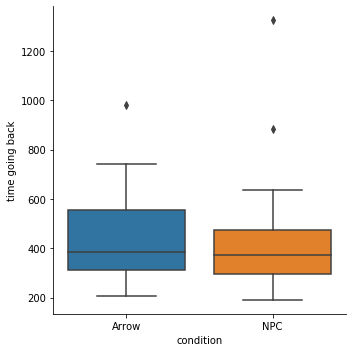

In [30]:
sns.catplot(x = 'condition', y = "time going back", kind = "box", data = data)

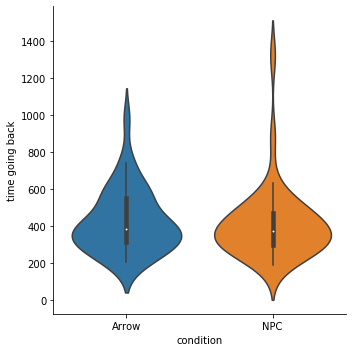

In [31]:
sns.catplot(x = 'condition', y = "time going back", kind = "violin", data = data)

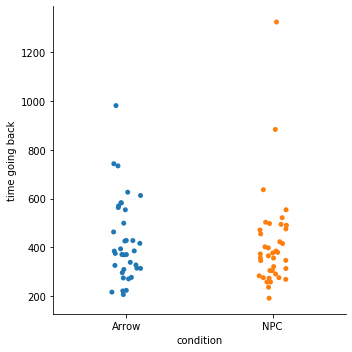

In [32]:
sns.catplot(x = 'condition', y = "time going back", kind = "strip", data = data)

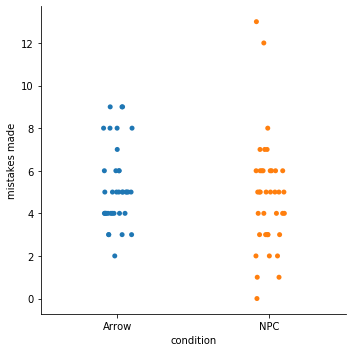

In [33]:
sns.catplot(x = 'condition', y = "mistakes made", kind = "strip", data = data)

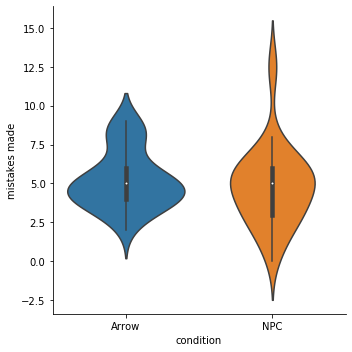

In [37]:
sns.catplot(x = 'condition', y = "mistakes made", kind = "violin", data = data)